<a href="https://colab.research.google.com/github/zunairakhan123/Blogggg/blob/master/CNN(CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


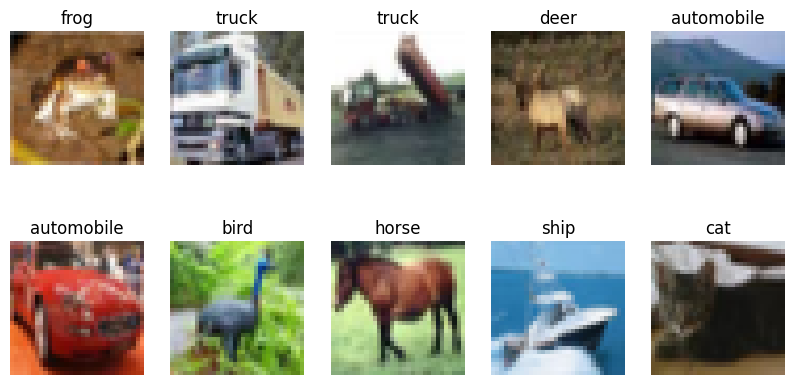

In [3]:
# Define the class labels
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Initialize the figure and subplots
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through the first 10 images
for i, ax in enumerate(axes.flat):
    # Select the image and label
    image, label = x_train[i], y_train[i]

    # Display the image
    ax.imshow(image, cmap='gray')

    # Set the title with the class label
    ax.set_title(f"{class_labels[label.item()]}")
    ax.axis('off')

# Display the figure
plt.show()

In [4]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
# Convert class vectors to binary class matrices / one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [7]:
# Define the CNN model
model = Sequential()
# Conv2D layer with 32 filters, kernel size 3x3, input shape (32, 32, 3)
# Input size: 32x32x3, Kernel size: 3x3, Number of kernels: 32, Output size: 30x30x32. [input_size-kernel]+1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# MaxPooling2D layer with pool size 2x2
# Output size: 15x15x32
model.add(MaxPooling2D((2, 2)))

#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


# Conv2D layer with 64 filters, kernel size 3x3
# Input size: 15x15x32, Kernel size: 3x3, Number of kernels: 64, Output size: 13x13x64
model.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPooling2D layer with pool size 2x2
# Output size: 6x6x64
model.add(MaxPooling2D((2, 2)))
# Conv2D layer with 64 filters, kernel size 3x3
# Input size: 6x6x64, Kernel size: 3x3, Number of kernels: 64, Output size: 4x4x64
model.add(Conv2D(64, (3, 3), activation='relu'))
# Flatten layer
# Output size: 1024
model.add(Flatten())
# Dense layer with 64 units
# Input size: 1024, Output size: 64
model.add(Dense(64, activation='relu'))
# Dense layer with 10 units (output layer)
# Input size: 64, Output size: 10

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#other optimizer SGD, RMSprop, Adadelta, Adagrad, Adamax etc
# other loss functions are mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_logarithmic_error, binary_crossentropy

In [10]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=5,
          validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3603 - loss: 1.7312 - val_accuracy: 0.5705 - val_loss: 1.1927
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5856 - loss: 1.1645 - val_accuracy: 0.6417 - val_loss: 1.0161
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.6481 - loss: 0.9970 - val_accuracy: 0.6262 - val_loss: 1.0992
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6847 - loss: 0.8976 - val_accuracy: 0.6727 - val_loss: 0.9305
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.7156 - loss: 0.8067 - val_accuracy: 0.6892 - val_loss: 0.9067


In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6926 - loss: 0.8954
Test accuracy: 0.6891999840736389


In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(x_train, y_train)
print('Test accuracy:', accuracy)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7415 - loss: 0.7343
Test accuracy: 0.7411199808120728


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


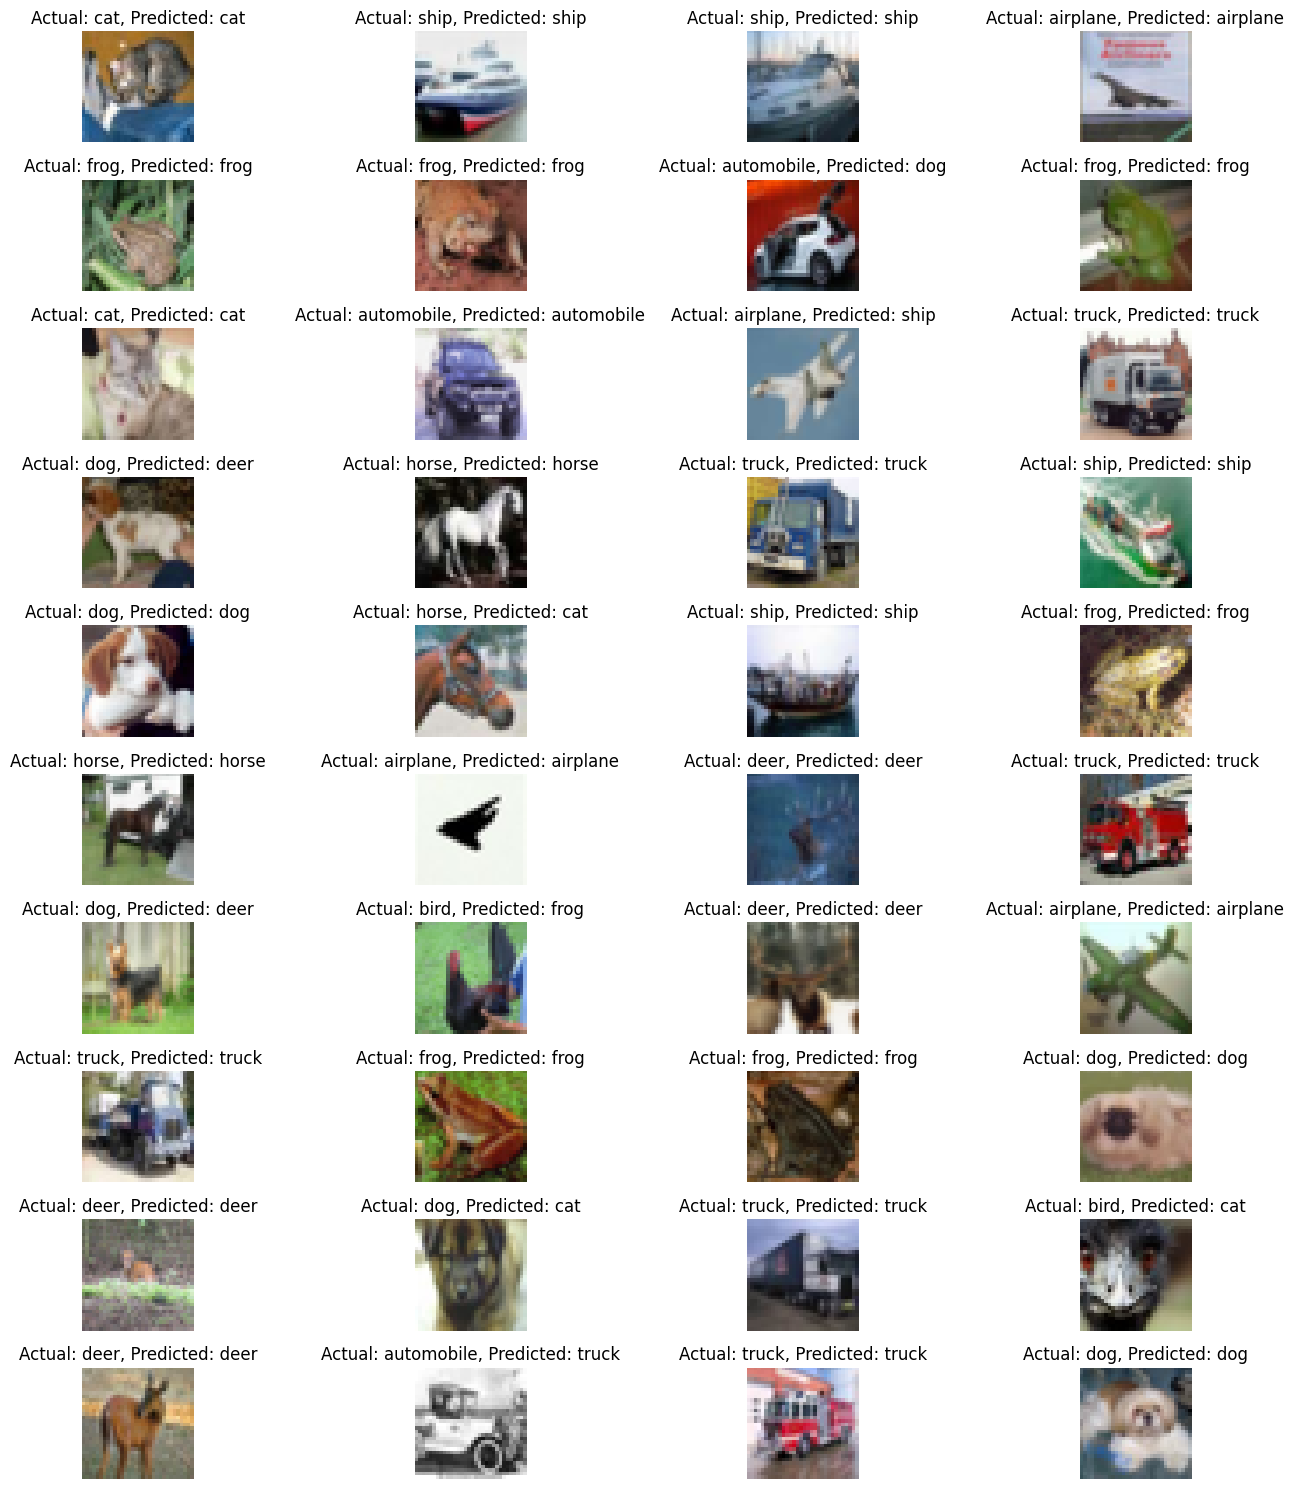

In [14]:
# Add this line before the plotting code
pred = model.predict(x_test)

num_images_to_display = 40
num_columns = 4
num_rows = (num_images_to_display + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        ax.imshow(x_test[i])
        actual_label = class_labels[np.argmax(y_test[i])]
        predicted_label = class_labels[np.argmax(pred[i])] # pred is now defined
        ax.set_title(f"Actual: {actual_label}, Predicted: {predicted_label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()